# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [10]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [11]:
#Create url and define params
weather_url = "http://api.openweathermap.org/data/2.5/weather?"

params={
    'q':'city name',
    'appid': weather_api_key,
    'units': 'imperial'
}

In [12]:
#Create a dictionary to store the data
data = {
    'City':[],
    'Cloudiness':[],
    'Country':[],
    'Date':[],
    'Humidity':[],
    'Lat':[],
    'Lng':[],
    'Max Temp':[],
    'Wind Speed':[]
}

In [13]:
print('Beginning Data Retrieval')
print('-----------------------------')
count = 1

for city in cities:
    print(f'Processing Record {count} | {city}')
    params['q'] = city
    response = requests.get(weather_url,params).json()
    
    if response['cod'] == '404':
        print('City not found. Skipping...')
    else:
        data['City'].append(city)
        data['Cloudiness'].append(response['clouds']['all'])
        data['Country'].append(response['sys']['country'])
        data['Date'].append(response['dt'])
        data['Humidity'].append(response['main']['humidity'])
        data['Lat'].append(response['coord']['lat'])
        data['Lng'].append(response['coord']['lon'])
        data['Max Temp'].append(response['main']['temp_max'])
        data['Wind Speed'].append(response['wind']['speed'])
    count += 1
print('-----------------------------')
print('Data Retrieval Complete')
print('-----------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 1 | jamestown
Processing Record 2 | buala
Processing Record 3 | castro
Processing Record 4 | pangnirtung
Processing Record 5 | bredasdorp
Processing Record 6 | ilulissat
Processing Record 7 | bacolod
Processing Record 8 | amderma
City not found. Skipping...
Processing Record 9 | georgetown
Processing Record 10 | onguday
Processing Record 11 | lompoc
Processing Record 12 | severo-kurilsk
Processing Record 13 | barrow
Processing Record 14 | port alfred
Processing Record 15 | port elizabeth
Processing Record 16 | kill
Processing Record 17 | kapaa
Processing Record 18 | east london
Processing Record 19 | gorontalo
Processing Record 20 | port-cartier
Processing Record 21 | mataura
Processing Record 22 | thompson
Processing Record 23 | vestmannaeyjar
Processing Record 24 | banda aceh
Processing Record 25 | nizhneyansk
City not found. Skipping...
Processing Record 26 | coquimbo
Processing Record 27 | ushuaia
Processing R

City not found. Skipping...
Processing Record 232 | muros
Processing Record 233 | upernavik
Processing Record 234 | saldanha
Processing Record 235 | borgarnes
Processing Record 236 | kaputa
Processing Record 237 | tiksi
Processing Record 238 | harmanli
Processing Record 239 | cabatuan
Processing Record 240 | leh
Processing Record 241 | brigantine
Processing Record 242 | clyde river
Processing Record 243 | ixtapa
Processing Record 244 | aklavik
Processing Record 245 | longyearbyen
Processing Record 246 | kieta
Processing Record 247 | karabulak
Processing Record 248 | nuevo progreso
Processing Record 249 | hilo
Processing Record 250 | sheopur
Processing Record 251 | ribeira grande
Processing Record 252 | praia
Processing Record 253 | boyolangu
Processing Record 254 | gizo
Processing Record 255 | port alberni
Processing Record 256 | tura
Processing Record 257 | high prairie
Processing Record 258 | sentyabrskiy
City not found. Skipping...
Processing Record 259 | cururupu
Processing Record 

Processing Record 463 | lamu
Processing Record 464 | chicama
Processing Record 465 | campoverde
Processing Record 466 | raudeberg
Processing Record 467 | fairbanks
Processing Record 468 | olkhovka
Processing Record 469 | san carlos
Processing Record 470 | fort nelson
Processing Record 471 | durant
Processing Record 472 | ust-maya
Processing Record 473 | barbar
City not found. Skipping...
Processing Record 474 | mitu
Processing Record 475 | ambatofinandrahana
Processing Record 476 | port stanley
Processing Record 477 | boshnyakovo
Processing Record 478 | nhulunbuy
Processing Record 479 | tornio
Processing Record 480 | airai
Processing Record 481 | charters towers
Processing Record 482 | orasu nou
Processing Record 483 | maumere
Processing Record 484 | novoagansk
Processing Record 485 | pantabangan
Processing Record 486 | la crosse
Processing Record 487 | zyryanka
Processing Record 488 | chuchkovo
Processing Record 489 | katsuura
Processing Record 490 | morro bay
Processing Record 491 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
data_df = pd.DataFrame(data)
data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,jamestown,90,US,1584401193,45,42.10,-79.24,46.99,13.87
1,buala,64,SB,1584401420,67,-8.14,159.59,84.60,5.35
2,castro,50,BR,1584401420,97,-24.79,-50.01,66.02,7.36
3,pangnirtung,90,CA,1584401420,76,66.15,-65.71,-4.00,4.70
4,bredasdorp,40,ZA,1584401420,77,-34.53,20.04,66.99,16.11


In [15]:
data_df.to_csv("weather.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

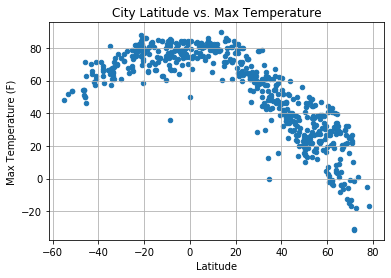

In [16]:
data_df.plot(kind='scatter',x='Lat',y='Max Temp',title='City Latitude vs. Max Temperature')

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(b=True)

#### Latitude vs. Humidity Plot

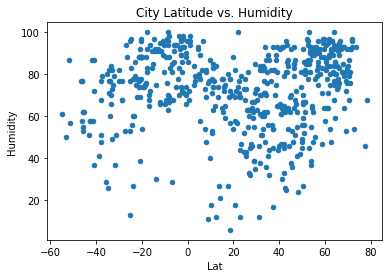

In [17]:
data_df.plot(kind='scatter',x='Lat',y='Humidity',title='City Latitude vs. Humidity')

#### Latitude vs. Cloudiness Plot

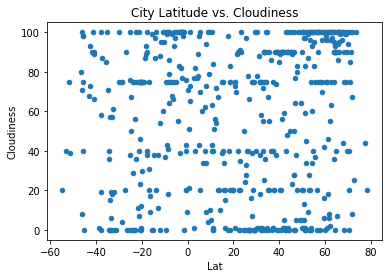

In [18]:
data_df.plot(kind='scatter',x='Lat',y='Cloudiness',title='City Latitude vs. Cloudiness')

#### Latitude vs. Wind Speed Plot

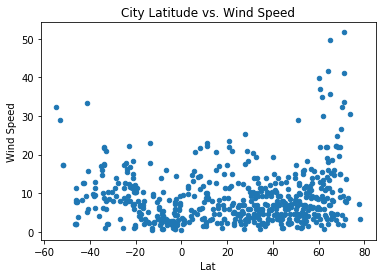

In [19]:
data_df.plot(kind='scatter',x='Lat',y='Wind Speed',title='City Latitude vs. Wind Speed')

## Linear Regression

In [20]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_regress(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    plt.plot(x_values,regress_values,"r-")
    print(f"The r-squared is: {rvalue**2}")
    return "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [22]:
# Create Northern and Southern Hemisphere DataFrames
northernHemisphere = data_df.loc[data_df['Lat']>0]
southernHemisphere = data_df.loc[data_df['Lat']<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7753554203495246


Text(0, 0, 'y = -1.15x + 90.85')

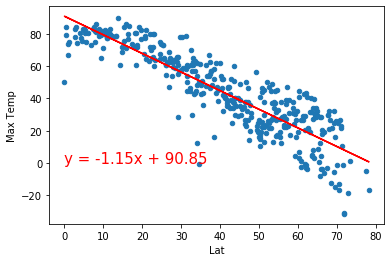

In [23]:
northernHemisphere.plot(kind='scatter',x='Lat',y='Max Temp')
line_eq = linear_regress(northernHemisphere['Lat'],northernHemisphere['Max Temp'])
plt.annotate(line_eq,(0,0),fontsize=15,color="red")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.3718379440286455


Text(-30, 50, 'y = 0.42x + 81.12')

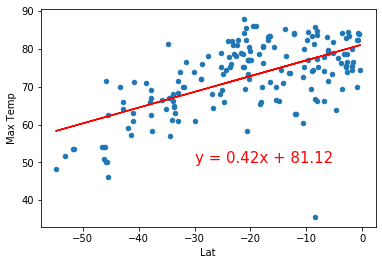

In [24]:
southernHemisphere.plot(kind='scatter',x='Lat',y='Max Temp')
line_eq = linear_regress(southernHemisphere['Lat'],southernHemisphere['Max Temp'])
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.07318692437049164


Text(30, 20, 'y = 0.27x + 59.72')

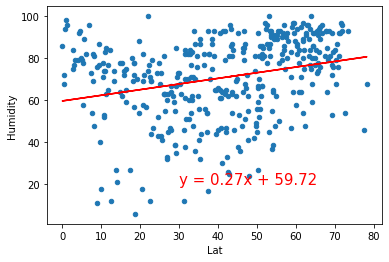

In [25]:
northernHemisphere.plot(kind='scatter',x='Lat',y='Humidity')
line_eq = linear_regress(northernHemisphere['Lat'],northernHemisphere['Humidity'])
plt.annotate(line_eq,(30,20),fontsize=15,color="red")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.19172900915470306


Text(-30, 40, 'y = 0.54x + 86.93')

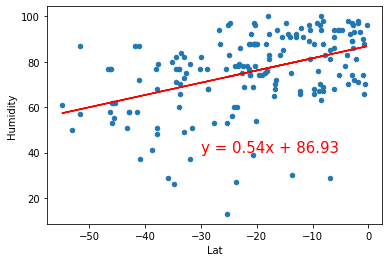

In [26]:
southernHemisphere.plot(kind='scatter',x='Lat',y='Humidity')
line_eq = linear_regress(southernHemisphere['Lat'],southernHemisphere['Humidity'])
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05390241403794397


Text(40, 30, 'y = 0.45x + 37.62')

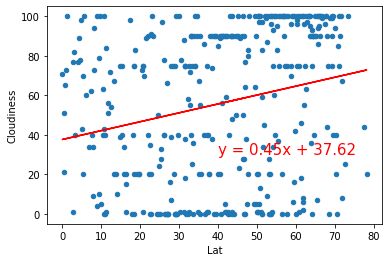

In [27]:
northernHemisphere.plot(kind='scatter',x='Lat',y='Cloudiness')
line_eq = linear_regress(northernHemisphere['Lat'],northernHemisphere['Cloudiness'])
plt.annotate(line_eq,(40,30),fontsize=15,color="red")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.04428498468916891


Text(-50, 60, 'y = 0.55x + 69.44')

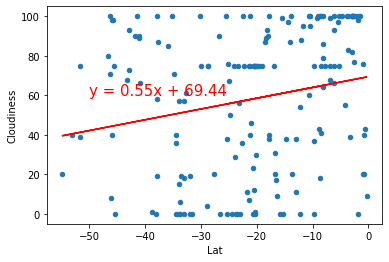

In [28]:
southernHemisphere.plot(kind='scatter',x='Lat',y='Cloudiness')
line_eq = linear_regress(southernHemisphere['Lat'],southernHemisphere['Cloudiness'])
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.04868934013347765


Text(10, 30, 'y = 0.09x + 5.78')

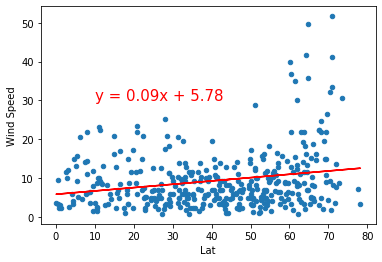

In [29]:
northernHemisphere.plot(kind='scatter',x='Lat',y='Wind Speed')
line_eq = linear_regress(northernHemisphere['Lat'],northernHemisphere['Wind Speed'])
plt.annotate(line_eq,(10,30),fontsize=15,color="red")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.21527157456157048


Text(-30, 30, 'y = -0.2x + 3.91')

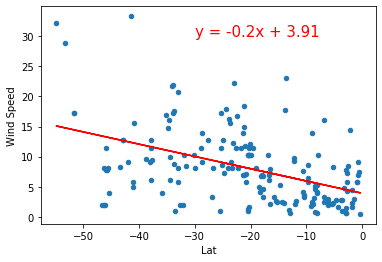

In [30]:
southernHemisphere.plot(kind='scatter',x='Lat',y='Wind Speed')
line_eq = linear_regress(southernHemisphere['Lat'],southernHemisphere['Wind Speed'])
plt.annotate(line_eq,(-30,30),fontsize=15,color="red")